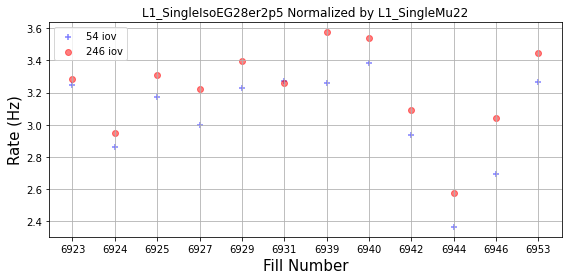

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# assign path
path1, dirs1, files1 = next(os.walk("./onceperfill/"))
file_countopf = len(files1)

# assign path
path2, dirs2, files2 = next(os.walk("./twiceperweek/"))
file_counttpw = len(files2)

# create empty lists
dfs_listopf = []
dfs_listtpw = []
filenameopf = []
filenametpw = []
# append datasets to the list
for i in range(file_countopf):
    temp_df = pd.read_csv("./onceperfill/"+files1[i])
    names = files1[i]
    filenameopf.append(names)
    dfs_listopf.append(temp_df)  

for i in range(file_counttpw):
    temp_df = pd.read_csv("./twiceperweek/"+files2[i])
    names = files2[i]
    filenametpw.append(names)
    dfs_listtpw.append(temp_df)

# display datsets
#for dataset in dfs_listtpw:
#    display(dataset)
filenameopf = [x.replace('_246', '') for x in filenameopf]
filenameopf = [x.replace('.csv', '') for x in filenameopf]
filenametpw = [x.replace('_54', '') for x in filenametpw]
filenametpw = [x.replace('.csv', '') for x in filenametpw]

#--------sometimes important to uncomment and check if 
#there is any ghost fillnumber other than the expected---------------
#filenametpw 
#filenameopf

# set index to L1SeedName and print the rate0
rateopf = []
ratetpw = []
rateopf2 = []
ratetpw2 = []
for df in dfs_listopf:
    df.set_index('L1SeedName', inplace=True)
    df = df.loc[['L1_SingleIsoEG28er2p5','L1_SingleMu22']]
    df = df.reset_index()
    l = df.iloc[0]['rate0']
    l2 = df.iloc[1]['rate0']
    l = l/l2
    rateopf.append(l)
    
for df in dfs_listtpw:
    df.set_index('L1SeedName', inplace=True)
    df = df.loc[['L1_SingleIsoEG28er2p5','L1_SingleMu22']]
    df = df.reset_index()
    l = df.iloc[0]['rate0']
    l2 = df.iloc[1]['rate0']
    l = l/l2
    ratetpw.append(l)


#creating dataframe from the seed rates
df_opf = pd.DataFrame({'Fill_Number':filenameopf, 'rate':rateopf})
df_opf = df_opf.sort_values(by=['Fill_Number'])
df_tpw = pd.DataFrame({'Fill_Number':filenametpw, 'rate':ratetpw})
df_tpw = df_tpw.sort_values(by=['Fill_Number'])

#finally a sigh of relief after all the juggling
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df_tpw["Fill_Number"],df_tpw["rate"],color="blue",marker="+", alpha=0.5)
ax.scatter(df_opf["Fill_Number"],df_opf["rate"],color="red",marker="o", alpha=0.5)
ax.set_xlabel('Fill Number', fontsize=15)
ax.set_ylabel('Rate (Hz)', fontsize=15)
ax.set_title('L1_SingleIsoEG28er2p5 Normalized by L1_SingleMu22')
ax.legend(['54 iov','246 iov'])
ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
['L1_SingleMu22','L1_SingleEG36er2p5','L1_SingleEG60','L1_SingleIsoEG28_FWD2p5','L1_SingleIsoEG28er2p5','L1_SingleIsoEG28er2p1','L1_SingleIsoEG28er1p5','L1_DoubleEG_25_12_er2p5','L1_DoubleIsoTau32er2p1','L1_SingleJet180','L1_SingleJet180er2p5','L1_ETT2000','L1_ETMHF100']